Prediction using Supervised Machine Learning

In [1]:
#Importing all the necessary modules matplotlib inline

import pandas as pd #reading csv file and creating a dataframe

import numpy as np

import matplotlib.pyplot as plt #for plotting data from url and trained data

from sklearn.linear_model import LinearRegression

Importing the data-set

In [2]:
url="http://bit.ly/w-data" 
df = pd.read_csv(url)
print("The given dataset: ") 
df.head(25)

The given dataset: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting the given data

<function matplotlib.pyplot.show(close=None, block=None)>

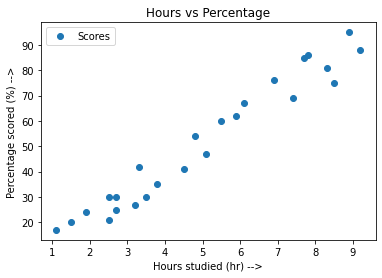

In [3]:
#Plotting the given data in 2-D to understand the distribution of data and the relation between scores and study hours. 
df.plot(x = "Hours", y = "Scores", style = "o") 
plt.title("Hours vs Percentage") 
plt.xlabel("Hours studied (hr) -->")
plt.ylabel("Percentage scored (%) -->")
plt.show

Here, We can observe that there is a positive co-relation between the number of hours studied and score obtained.

Preparing Data

In [7]:
#Selecting the values of data from the dataframe
X= df.iloc[:,:-1].values 
Y = df.iloc[:,1].values

In [8]:
#Splitting the data values obtained into training and testing samples: 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state= 0)

TRAINING THE MODEL

In [9]:
#Sample data taken for training are trained using Linear Regression model's algorithm. 
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Data trained successfully!")

Data trained successfully!


REGRESSION LINE

In [11]:
#Finding the slope and intercept for the Regression Line 
slope = regressor.coef_ 
interc= regressor.intercept_ 
print("Slope: ", slope,"\nY-Intercept: ", interc)

Slope:  [9.94167834] 
Y-Intercept:  1.9322042531516601


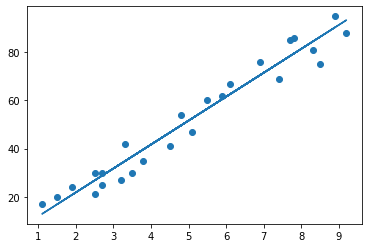

In [12]:
#Plotting the trained regression model's output using a Line equation(mx+y) 
Relation = slope*X + interc
plt.scatter(X,Y)
plt.plot(X,Relation)
plt.show()

MAKING PREDICTIONS using the trained data, we are predicting the student's score using predict method.

In [14]:
y_pred = regressor.predict(X_test) 
print("Hours studied\n", X_test)
df1 = pd.DataFrame({'Actual score': Y_test, 'Predicted score': y_pred})
df1

Hours studied
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


,Actual score,Predicted score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


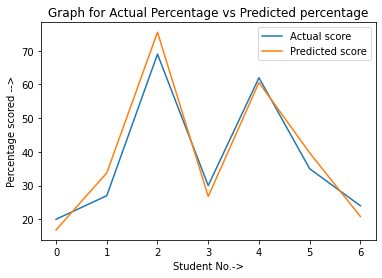

In [16]:
df1.plot(kind = "line") 
plt.title("Graph for Actual Percentage vs Predicted percentage") 
plt.xlabel("Student No.->") 
plt.ylabel("Percentage scored -->")
plt.show()

GET THE RESULT DIRECTLY: Predicting the percentage of a student who studied for 9.25 hours.

In [18]:
#Predict function can be used to calculate the student score if the given amount of time he studied is given. 
hours = 9.25

fin_pred = round(regressor.predict([[9.25]]) [0],2) 
print("No of Hours studied {}".format(hours)) 
print("Predicted score = {}".format(fin_pred))

No of Hours studied 9.25
Predicted score = 93.89


In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.130879918502482
